In [1]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet

base_model = MobileNet(include_top=False, weights='imagenet', classes=1000)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/Users/django/anaconda3/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 636s 37us/step


In [2]:
#base_model.summary()

In [3]:
from keras.models import Model

x = base_model.output
x=GlobalAveragePooling2D()(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input, outputs=preds)

In [4]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [5]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image

import numpy as np

train_dir = 'data/train'
class_name = ["哈士奇", "金毛"]

def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224)) # MobileNet 输入图像尺寸 
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)


train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        color_mode='rgb',
        batch_size=10,
        class_mode='categorical',
        shuffle=True)

Found 20 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
10/10 [==============================] - 17s 2s/step - loss: 0.0873 - acc: 0.9600
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.2869 - acc: 0.9500
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.0698 - acc: 0.9900
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 0.0044 - acc: 1.0000
Epoch 5/5
10/10 [==============================] - 13s 1s/step - loss: 0.2687 - acc: 0.9400


In [8]:
from matplotlib import pyplot as plt

def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return img_tensor

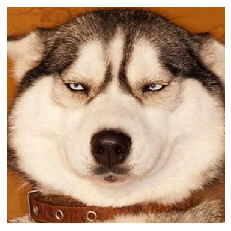

[['哈士奇', 1.0], ['金毛', 1.4871757e-27]]


In [9]:
img_path = 'data/test/3.jpg'
img_tensor = load_image(img_path)

pred = model.predict(img_tensor)

print([[class_name[i], prob] for i, prob in enumerate(pred[0])])

In [10]:
model.save("model/mobilenet_dog.h5")

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________